In [17]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
Case_GridSearch_1 = pd.read_csv("hyperparameters_ANN_L2_L2_GridSearch_V1_1.csv")
Case_GridSearch_2 = pd.read_csv("hyperparameters_ANN_L2_L2_GridSearch_V1_2.csv")
Case_GridSearch_3 = pd.read_csv("hyperparameters_ANN_L2_L2_GridSearch_V2_1.csv")
Case_GridSearch_4 = pd.read_csv("hyperparameters_ANN_L2_L2_GridSearch_V2_2.csv")
Case_GridSearch_5 = pd.read_csv("hyperparameters_ANN_L2_L2_GridSearch_V3_1.csv")
Case_GridSearch_6 = pd.read_csv("hyperparameters_ANN_L2_L2_GridSearch_V3_2.csv")
Case_GridSearch_7 = pd.read_csv("hyperparameters_ANN_L2_L2_GridSearch_V4_1.csv")
Case_GridSearch_8 = pd.read_csv("hyperparameters_ANN_L2_L2_GridSearch_V4_2.csv")
Case_GridSearch_9 = pd.read_csv("hyperparameters_ANN_L2_L2_GridSearch_V5_1.csv")
Case_GridSearch_10 = pd.read_csv("hyperparameters_ANN_L2_L2_GridSearch_V5_2.csv")
Case_GridSearch_11 = pd.read_csv("hyperparameters_ANN_L2_L2_GridSearch_V6_1.csv")
Case_GridSearch_12 = pd.read_csv("hyperparameters_ANN_L2_L2_GridSearch_V6_2.csv")

In [19]:
Case1_GridSearch = pd.concat([Case_GridSearch_1, Case_GridSearch_2, 
                              Case_GridSearch_3, Case_GridSearch_4,
                              Case_GridSearch_5, Case_GridSearch_6,
                              Case_GridSearch_7, Case_GridSearch_8,
                              Case_GridSearch_9, Case_GridSearch_10,
                              Case_GridSearch_11, Case_GridSearch_12], axis=0)

In [20]:
Case1_GridSearch.head()

,Unnamed: 0,Activation_1,Activation_2,Layer_1,Layer_2,LeanringRate,Op_val_epoch,Op_val_loss,Run,dropout_1,dropout_2,loss,val_loss
0,0,selu,selu,200,400,0.00030,2992,0.103852,0,0.8,0.7,0.079874,0.104317
1,1,sigmoid,sigmoid,450,450,0.00060,2998,0.106807,1,0.8,0.8,0.115480,0.107375
2,2,elu,relu,500,50,0.00090,2999,0.131323,2,0.1,0.1,0.134964,0.131323
3,3,elu,tanh,400,450,0.00005,2957,0.193940,3,0.7,0.1,0.189838,0.193961
4,4,sigmoid,tanh,50,200,0.00030,2978,0.125113,4,0.3,0.5,0.111227,0.125775


In [21]:
print(Case1_GridSearch.shape)

(360, 13)


In [22]:
Case1_GridSearch_TOP = Case1_GridSearch.sort_values(by="val_loss")
Case1_GridSearch_TOP_np = np.array(Case1_GridSearch_TOP)
Case1_GridSearch_TOP_pd = pd.DataFrame(Case1_GridSearch_TOP_np)
Case1_GridSearch_TOP100_pd = Case1_GridSearch_TOP_pd.loc[:200]

In [23]:
Case1_GridSearch_TOP100_pd.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0,elu,selu,250,50,0.0007,2904,0.0927731,0,0.2,0.3,0.0747181,0.09366
1,23,elu,selu,450,50,0.0004,2947,0.0959874,23,0.5,0.1,0.0933385,0.0961797
2,25,tanh,selu,500,300,0.0007,2989,0.0961172,25,0.3,0.8,0.0918024,0.0966526
3,15,elu,relu,50,450,0.0007,2993,0.0980316,15,0.4,0.1,0.0802202,0.0990391
4,1,selu,relu,300,150,0.0006,2986,0.0993533,1,0.5,0.6,0.10141,0.100159


In [24]:
print(Case1_GridSearch_TOP100_pd.shape)

(201, 13)


In [33]:
Activation_1 = Case1_GridSearch_TOP100_pd[1].sort_values()
Activation_2 = Case1_GridSearch_TOP100_pd[2].sort_values()
Layer_1 = Case1_GridSearch_TOP100_pd[3]
Layer_2 = Case1_GridSearch_TOP100_pd[4]
LeanringRate = Case1_GridSearch_TOP100_pd[5]
Op_val_epoch = Case1_GridSearch_TOP100_pd[6]
Op_val_loss = Case1_GridSearch_TOP100_pd[7]
dropout_1 = Case1_GridSearch_TOP100_pd[9]
dropout_2 = Case1_GridSearch_TOP100_pd[10]
loss = Case1_GridSearch_TOP100_pd[11]
val_loss = Case1_GridSearch_TOP100_pd[12].astype(float)

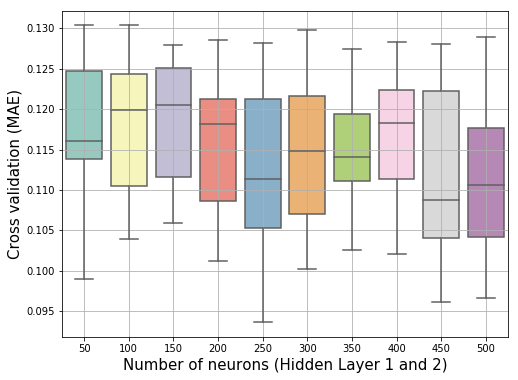

In [34]:
import seaborn as sns

figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(8, 6)

sns.boxplot(x=Layer_1, y=val_loss, data=Case1_GridSearch_TOP100_pd, palette="Set3", orient="v", whis=10, ax=ax1)

ax1.set_xlabel("Number of neurons (Hidden Layer 1 and 2)",fontsize=15)
ax1.set_ylabel("Cross validation (MAE)",fontsize=15)
# ax1.set_ylim(0.1, 0.13)
ax1.grid()

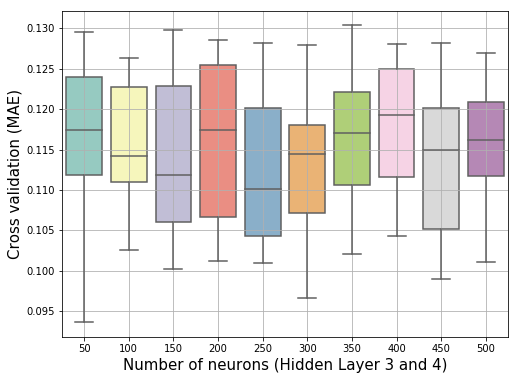

In [35]:
import seaborn as sns

figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(8, 6)

sns.boxplot(x=Layer_2, y=val_loss, data=Case1_GridSearch_TOP100_pd, palette="Set3", orient="v", whis=10, ax=ax1)

ax1.set_xlabel("Number of neurons (Hidden Layer 3 and 4)",fontsize=15)
ax1.set_ylabel("Cross validation (MAE)",fontsize=15)
# ax1.set_ylim(0.1, 0.13)
ax1.grid()

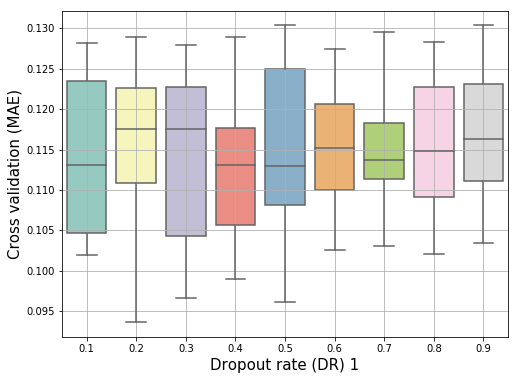

In [36]:
figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(8, 6)

sns.boxplot(x=dropout_1, y=val_loss, data=Case1_GridSearch_TOP100_pd, palette="Set3", orient="v", whis=10, ax=ax1)

ax1.set_xlabel("Dropout rate (DR) 1",fontsize=15)
ax1.set_ylabel("Cross validation (MAE)",fontsize=15)
# ax1.set_ylim(0.1, 0.13)
ax1.grid()

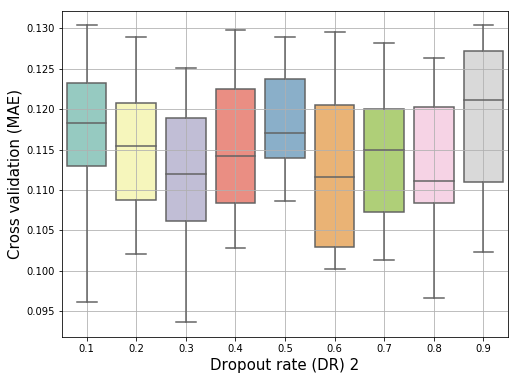

In [37]:
figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(8, 6)

sns.boxplot(x=dropout_2, y=val_loss, data=Case1_GridSearch_TOP100_pd, palette="Set3", orient="v", whis=10, ax=ax1)

ax1.set_xlabel("Dropout rate (DR) 2",fontsize=15)
ax1.set_ylabel("Cross validation (MAE)",fontsize=15)
# ax1.set_ylim(0.1, 0.13)
ax1.grid()

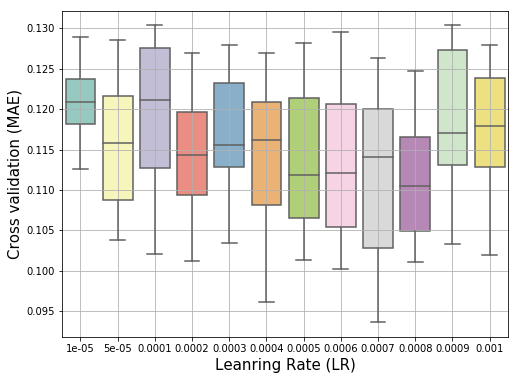

In [38]:
figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(8, 6)

sns.boxplot(x=LeanringRate, y=val_loss, data=Case1_GridSearch_TOP100_pd, palette="Set3", orient="v", whis=10, ax=ax1)

ax1.set_xlabel("Leanring Rate (LR)",fontsize=15)
ax1.set_ylabel("Cross validation (MAE)",fontsize=15)
# ax1.set_ylim(0.1, 0.13)
ax1.grid()

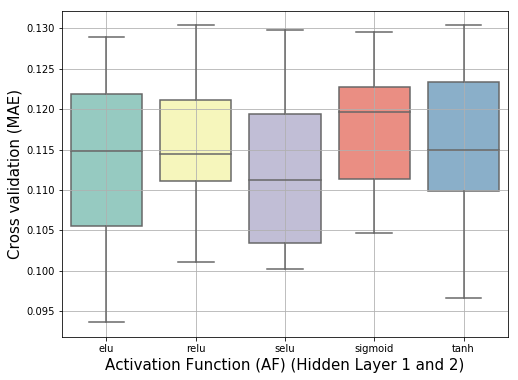

In [39]:
figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(8, 6)

sns.boxplot(x=Activation_1, y=val_loss, data=Case1_GridSearch_TOP100_pd, palette="Set3", orient="v", whis=10, ax=ax1)

ax1.set_xlabel("Activation Function (AF) (Hidden Layer 1 and 2)",fontsize=15)
ax1.set_ylabel("Cross validation (MAE)",fontsize=15)
# ax1.set_ylim(0.1, 0.13)
ax1.grid()

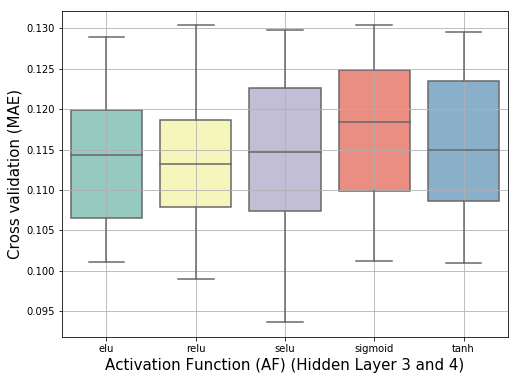

In [40]:
figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(8, 6)

sns.boxplot(x=Activation_2, y=val_loss, data=Case1_GridSearch_TOP100_pd, palette="Set3", orient="v", whis=10, ax=ax1)

ax1.set_xlabel("Activation Function (AF) (Hidden Layer 3 and 4)",fontsize=15)
ax1.set_ylabel("Cross validation (MAE)",fontsize=15)
# ax1.set_ylim(0.1, 0.13)
ax1.grid()